170508288/170498071 [==============================] - 11s 0us/step
Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


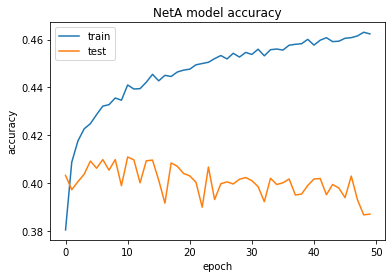

train_accuracy: 0.4630599915981293
test_accuracy: 0.4108999967575073


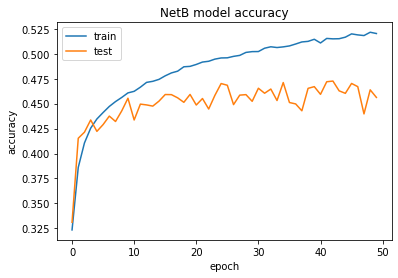

train_accuracy: 0.5214999914169312
test_accuracy: 0.4726000130176544


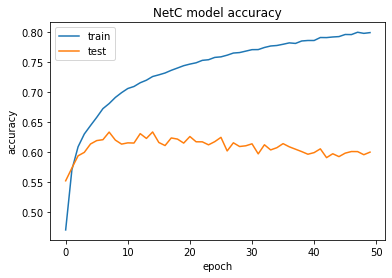

train_accuracy: 0.7998200058937073
test_accuracy: 0.6331999897956848


In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

class NetA:
  model = Sequential()
  model.add(Dense(12))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), verbose = 0)
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('NetA model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  best_train_score = max(history.history['accuracy'])
  print('train_accuracy:', best_train_score)
  best_test_score = max(history.history['val_accuracy'])
  print('test_accuracy:', best_test_score)

class NetB:
  model = Sequential()
  model.add(Flatten(input_shape=(32, 32, 3)))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), verbose = 0)
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('NetB model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  best_train_score = max(history.history['accuracy'])
  print('train_accuracy:', best_train_score)
  best_test_score = max(history.history['val_accuracy'])
  print('test_accuracy:', best_test_score)

class NetC:
  model = Sequential()
  model.add(Conv2D(25, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test), verbose = 0)
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('NetC model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  best_train_score = max(history.history['accuracy'])
  print('train_accuracy:', best_train_score)
  best_test_score = max(history.history['val_accuracy'])
  print('test_accuracy:', best_test_score)